In [2]:
import yfinance as yf
import ta
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
df = yf.download('HRB', start='2020-01-01')

[*********************100%%**********************]  1 of 1 completed


In [26]:
def get_indicators(df):
    df['SMA_200'] = ta.trend.sma_indicator(df["Close"], window=200)
    df['MACD'] = ta.trend.macd(df["Close"])
    df['EMA'] = ta.trend.ema_indicator(df["Close"], window=200)
    df['Stoch_RSI'] = ta.momentum.stochrsi_k(df["Close"], window=10)
    df['TSI'] = ta.momentum.tsi(df["Close"])
    df.dropna(inplace=True)

In [24]:
get_indicators(df)

In [25]:
df['Buy'] = (df['Close'] > df['SMA_200']) & (df['Stoch_RSI'] < 0.05)
df

,Open,High,Low,Close,Adj Close,Volume,SMA_200,Stoch_RSI,TSI,Buy,MACD
Date,,,,,,,,,,,
2021-08-02,24.730000,24.930000,24.520000,24.570000,22.397200,1150400,20.53315,0.895606,6.643107,False,0.136881
2021-08-03,24.530001,24.770000,24.440001,24.660000,22.479240,1281700,20.56910,0.906935,7.747378,False,0.153933
2021-08-04,24.530001,24.950001,24.330000,24.850000,22.652443,1496600,20.60615,0.938436,9.390050,False,0.180694
2021-08-05,24.969999,25.209999,24.900000,25.110001,22.889448,1257900,20.64335,1.000000,11.742802,False,0.220343
2021-08-06,25.129999,25.370001,24.910000,25.280001,23.044415,1185100,20.67995,1.000000,14.330487,False,0.262458
...,...,...,...,...,...,...,...,...,...,...,...
2024-03-13,47.959999,48.200001,47.490002,47.689999,47.689999,862200,41.34965,0.001352,5.012311,True,0.225983
2024-03-14,47.669998,47.689999,46.340000,46.639999,46.639999,1037400,41.43280,0.001352,1.949750,True,0.077139
2024-03-15,46.400002,47.250000,46.299999,46.759998,46.759998,3375200,41.51565,0.015763,-0.335971,True,-0.030784


In [7]:
buy_dates, sell_dates = [], []
buys, sells = [], []

last_sell_date = pd.to_datetime('1900-01-01')
buy_date = pd.to_datetime('1900-01-01')

In [8]:
for row in range(len(df) - 20):
    if len(sell_dates) > 0:
        last_sell_date = sell_dates[-1]
    if df.iloc[row]["Buy"]:
        buy_price = df.iloc[row]["Close"] * 0.97


        k = 1
        while k < 10:
            if buy_price >= df.iloc[row + k]["Low"]:
                buy_date = df.iloc[row + k].name
            k += 1

        if buy_date > last_sell_date:
            buy_dates.append(buy_date)
            buys.append(buy_price)

            for j in range(1, 11):
                if df.iloc[row + k + j]["Close"] > buy_price or j == 10:
                    sell_price = df.iloc[row + k + j + 1]["Open"]
                    sell_date = df.iloc[row + k + j + 1].name
                    sells.append(sell_price)
                    sell_dates.append(sell_date)
                    break

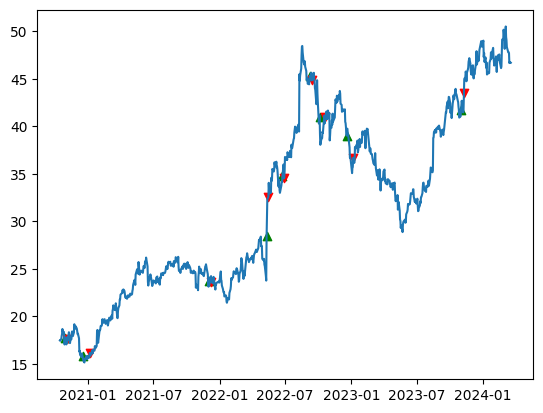

In [9]:
plt.plot(df["Close"])
plt.scatter(df.loc[buy_dates].index, df.loc[buy_dates]
            ["Close"], marker='^', c='g')
plt.scatter(df.loc[sell_dates].index, df.loc[sell_dates]
            ["Close"], marker='v', c='r')
plt.show()

In [10]:
profits = pd.DataFrame([(sell - buy) / buy for sell, buy in zip(sells, buys)])
profits.sum() + 1

0    1.046243
dtype: float64